# Advantage of using these tools
- Create a 32 year timesseries at a single point in < 1 min, because only the data chunks that are needed are loaded

# Import libraries

In [1]:
import xarray as xr
from glob import glob
import numpy as np
import os.path


import sys



# Old School
- Create a function to create filename and test if it exists

In [ ]:
def get_filename(lyr,idyjl):
    import datetime as dt
    import os.path
    data_dir = 'F:/data/sat_data/ccmp/v02.0/'
    d = dt.date(lyr,1,1) + dt.timedelta(idyjl)
    syr=str(d.year).zfill(4)
    smon=str(d.month).zfill(2)
    sdym=str(d.day).zfill(2)
    sjdy=str(idyjl).zfill(3)
    if (lyr>=2020) or ((lyr==2019) and (idyjl>119)):
        filename=data_dir + 'Y' + syr + '/M' + smon +  '/CCMP_RT_Wind_Analysis_'+ syr + smon + sdym +'_V02.0_L3.0_RSS.nc'
    else:
        filename=data_dir + 'Y' + syr + '/M' + smon +  '/CCMP_Wind_Analysis_'+ syr + smon + sdym +'_V02.0_L3.0_RSS.nc'
    iexist = os.path.isfile(filename) 
    return filename,iexist

In [ ]:
%%time
icnt = 0 
for lyr in range(1987,2021):
    for idyjl in range(1,367):
        fname,iexist = get_filename(lyr,idyjl)
        if iexist:
            ds_day=xr.open_dataset(fname)
            if icnt==0:
                ds = ds_day
                icnt=1
            else:
                ds = xr.concat([ds,ds_day],dim='time')
ds

# Using Xarray and glob methods on netcdf files

In [ ]:
%%time
#directory structure
pattern_netcdf = 'F:/data/sat_data/ccmp/v02.0/*/*/*_V02.0_L3.0_RSS.nc'
#list files
netcdf_file_list = [x for x in glob(pattern_netcdf)]

In [ ]:
%%time
#open dataset
ds=xr.open_mfdataset(files,combine='nested',concat_dim='time')

In [ ]:
%%time

ds['wspd'] = np.sqrt(ds.uwnd**2+ds.vwnd**2)

ts = ds.wspd.sel(latitude=slice(-10,0),longitude=slice(170,180)).mean({'latitude','longitude'}).plot()

# The same workflow using Zarr

In [2]:
%%time
pattern_zarr = 'F:/data/sat_data/ccmp/zarr2/'
ds= xr.open_zarr(pattern_zarr)
ds

Wall time: 483 ms


<xarray.Dataset>
Dimensions:    (latitude: 628, longitude: 1440, time: 48128)
Coordinates:
  * latitude   (latitude) float32 -78.375 -78.125 -77.875 ... 78.125 78.375
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * time       (time) datetime64[ns] 1987-07-10 ... 2020-07-30T18:00:00
Data variables:
    nobs       (time, latitude, longitude) float32 dask.array<chunksize=(1000, 157, 180), meta=np.ndarray>
    uwnd       (time, latitude, longitude) float32 dask.array<chunksize=(1000, 157, 180), meta=np.ndarray>
    vwnd       (time, latitude, longitude) float32 dask.array<chunksize=(1000, 157, 180), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.6
    base_date:                  Y1987 M07 D10
    comment:                    none
    contact:                    Remote Sensing Systems, support@remss.com
    contributor_name:           Joel Scott, Frank Wentz, Ross Hoffman, Mark L...
    contributor_role:           Software Engineer, Project Lead, Co-Investiga...
    creator_email:              support@remss.com
    creator_name:               Remote Sensing Systems
    creator_url:                http://www.remss.com/
    data_structure:             grid
    date_created:               20160211T150810Z
    description:                RSS VAM 6-hour analyses starting from the ERA...
    geospatial_lat_max:         78.375 degrees
    geospatial_lat_min:         -78.375 degrees
    geospatial_lat_resolution:  0.25 degrees
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         359.875 degrees
    geospatial_lon_min:         0.125 degrees
    geospatial_lon_resolution:  0.25 degrees
    geospatial_lon_units:       degrees_east
    history:                    20160211T150810ZZ - netCDF generated from ori...
    institute_id:               RSS
    institution:                Remote Sensing Systems (RSS)
    keywords:                   surface winds, ocean winds, wind speed/wind d...
    keywords_vocabulary:        GCMD Science Keywords
    license:                    available for public use with proper citation
    netcdf_version_id:          4.2
    processing_level:           L3.0
    product_version:            v2.0
    project:                    RSS Cross-Calibrated Multi-Platform Ocean Sur...
    publisher_email:            support@remss.com
    publisher_name:             Remote Sensing Systems
    publisher_url:              http://www.remss.com/
    references:                 Hoffman et al., Journal of Atmospheric and Oc...
    summary:                    CCMP V2.0 has been created using the same VAM...
    title:                      RSS CCMP V2.0 derived surface winds (Level 3.0)

Wall time: 1min 25s


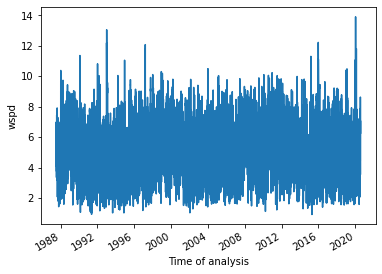

In [3]:
%%time

ds['wspd'] = np.sqrt(ds.uwnd**2+ds.vwnd**2)

ts = ds.wspd.sel(latitude=slice(-10,0),longitude=slice(170,180)).mean({'latitude','longitude'}).plot()